In [7]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5.0, 5.0)
np.random.seed(0)

In [2]:
mu = np.array([0, 0])
sgm = np.array([[1, 0.5], [0.5, 1]])
eg, egv = np.linalg.eig(sgm)

(-4, 4)

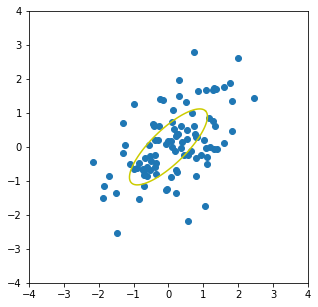

In [21]:
xs = np.random.multivariate_normal(mu, sgm, 100)
theta = np.linspace(0, 2*np.pi, 100)
elp = np.array([eg[0] * np.cos(theta), eg[1] * np.sin(theta)])
elp = np.dot(egv, elp)

plt.scatter(xs[:, 0], xs[:, 1])
plt.plot(elp[0, :], elp[1, :], color=(0.8, 0.8, 0.))
plt.xlim([-4, 4])
plt.ylim([-4, 4])

In [68]:
np.random.rand(2,)

array([0.41960036, 0.19922815])

In [82]:
T = 2000
x0 = np.array([0, 0])

smps = np.zeros((T + 1, 2))
smps[0, :] = x0
ar = np.zeros(T + 1).astype(int)
ar[0] = 1

for i in range(1, T+1):
    x1 = x0 + 2*(np.random.rand(2,) - 0.5)
    p0 = multivariate_normal.pdf(x0, mean=mu, cov=sgm)
    p1 = multivariate_normal.pdf(x1, mean=mu, cov=sgm)
    p = np.min((1., p1/p0))
    u = np.random.rand(1)
    if p > u:
        ar[i] = 1
        x0 = x1
    else:
        ar[i] = 0
        pass
    smps[i, :] = x0

(-4, 4)

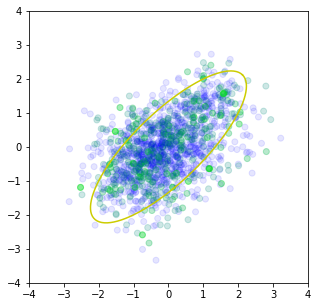

In [83]:
clrs = np.zeros((T + 1, 3))
clrs[np.arange(T + 1), ar +1] = 1
plt.scatter(smps[:, 0], smps[:, 1], color=clrs, alpha=0.1)
# for i in range(smps.shape[0] - 1):
#     plt.plot(smps[[i, i+ 1], 0], smps[[i, i+ 1], 1], color='g', alpha=0.3)
plt.plot(2*elp[0, :], 2*elp[1, :], color=(0.8, 0.8, 0.))
plt.xlim([-4, 4])
plt.ylim([-4, 4])